## Handwritten Image Classifiation with Keras using MNIST and Fashion MNIST data

In this project, we will work with image data, the famous MNIST and Fashion MNIST data sets.  MNIST data set contains 70,000 images of handwritten digits (0-9) in grayscale (0=black, 255 = white). Fashion MNIST data set contains 70,000 images of clothing in grayscale (0=black, 255 = white). All the images are 28 pixels by 28 pixels for a total of 784 pixels.

### In the first part of this project, we will walk you through loading the data, building a neural network, and training it.

In [2]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [3]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

Let's just look at a particular example to see what is inside

In [5]:
x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [6]:
# What is the corresponding label in the training set?
y_train[333]

np.uint8(8)

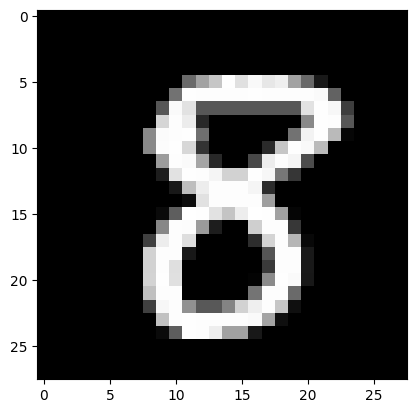

In [7]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [8]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [9]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [10]:
# convert class labels to one-hot vectors
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [11]:
# We will build a model with two fully connected layers (using "Dense")
# We will use dropout of .5 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.5))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
## print the summary of the built model. Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization
# of the loss function we had in binary classification case to multiclass case

In [14]:
# Now let's fit (train model_1).

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5723 - loss: 1.2829 - val_accuracy: 0.9203 - val_loss: 0.2793
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8590 - loss: 0.4956 - val_accuracy: 0.9335 - val_loss: 0.2298
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8844 - loss: 0.4089 - val_accuracy: 0.9429 - val_loss: 0.1956
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8992 - loss: 0.3656 - val_accuracy: 0.9474 - val_loss: 0.1837
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9031 - loss: 0.3446 - val_accuracy: 0.9532 - val_loss: 0.1745
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9057 - loss: 0.3342 - val_accuracy: 0.9524 - val_loss: 0.1713
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9113 - loss: 0.3239 - val_accuracy: 0.9541 - val_loss: 0.1752
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9140 - loss: 0.3152 - val_accuracy: 0.

In [15]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.16570164263248444
Test accuracy: 0.9635999798774719


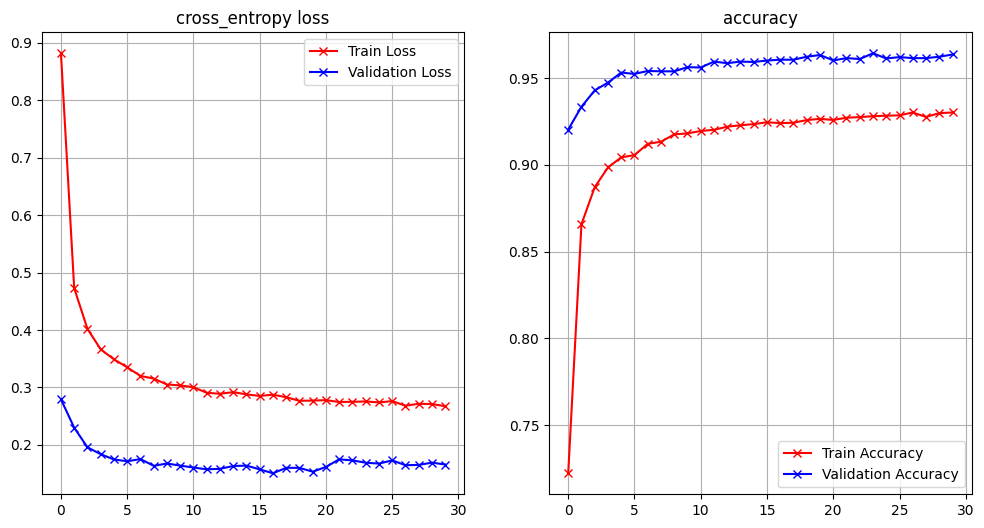

In [16]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

plot_loss_accuracy(history)

### Keras Layers for CNNs
- Previously we built a neural network using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

#### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained below for your convenience (please do check the manual of Keras to understand the meaning of all the paramters)
- `filters`: the number of filters,  in other words, the depth of the output.
- `kernel_size`: an (H,W) tuple giving the height and width of the kernel (filter) to be used. It can also be an integer x which is equivalent to a tuple (x,x)
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`. It can also be an integer x which is equivalent to a tuple (x,x)
- `input_shape`: required only for the first layer

Note that the size of the output will be determined by the kernel_size and strides.

#### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

#### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.


To use the LeNet model, we need to do some preprocessing on the data first.

In [17]:
# Data is currently flattened, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
# model_2 requires input of 32 X 32. So we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [19]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - accuracy: 0.8220 - loss: 0.5937 - val_accuracy: 0.9761 - val_loss: 0.0770
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9728 - loss: 0.0856 - val_accuracy: 0.9839 - val_loss: 0.0503
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9823 - loss: 0.0536 - val_accuracy: 0.9835 - val_loss: 0.0508
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.9867 - loss: 0.0402 - val_accuracy: 0.9880 - val_loss: 0.0359
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.9897 - loss: 0.0334 - val_accuracy: 0.9898 - val_loss: 0.0351
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9919 - loss: 0.0255 - val_accuracy: 0.9881 - val_loss: 0.0374
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9930 - loss: 0.0215 - val_accuracy: 0.9873 - val_loss: 0.0390
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9942 - loss: 0.0181 - 

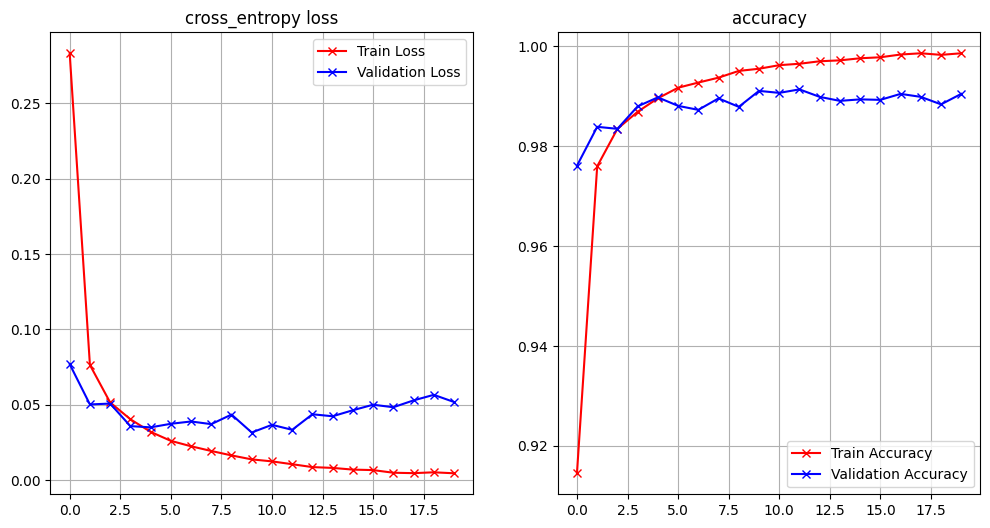

In [21]:
model_2 = Sequential()
model_2.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_2.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_2.add(Flatten())
model_2.add(Dense(120, activation='relu'))
model_2.add(Dense(84, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_2 = model_2.fit(x_train, y_train,
                        batch_size=128,
                        epochs=20,
                        verbose=1,
                        validation_data=(x_test, y_test))

score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_loss_accuracy(history_2)

### We will perform similar tasks for Fashion MNIST dataset.

Fashion MNIST has 10 categories of clothing items:<br>

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [22]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
x_train[0].shape

(28, 28)

In [24]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
         42,  92,  71, 107,  33,   0,   3,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  23,
        145,   0,   0,   0, 113,  20,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89,
          8,   0,  10,   0,  36, 104,   0,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  37,  97,
          0,   5,   1,   0,   0, 141,  23,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  70,  75,
          0,   6,   1,   0,   0, 141,  56,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  85,  57,
          0,   5,   1,   1,   0, 126,  62,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  85,  44,
          0,   3,   0,   4,   0, 109,  66,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  75,  41,
          0,   3,   0,   5,   0,  89,  68,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  71,  44,
          0,   3,   0,   6,   0,  74,  69,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,  80,  68,
          0,   4,   0,   5,   0,  89,  85,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   3,   8,   0,  74,  89,
          0,  10,   3,  10,   0,  98,  84,   0,  10,   4,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  30,  80,
          0,   0,   0,   0,   0,  69,  37,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,  80, 117, 118,  92, 125, 144,
        109, 141, 126, 132, 115, 151, 141, 130, 142, 150,  57,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  81, 162, 158, 153, 165, 192,
        182, 196, 187, 172, 183, 203, 206, 195, 188, 200, 140,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 114, 158, 169, 164, 164, 196,
        183, 177, 168, 163, 174, 195, 198, 195, 174, 170, 142,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 186, 166, 161, 180, 183, 214,
        181, 158, 163, 181, 186, 197, 186, 184, 193, 197,  86,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 162, 195, 185, 182, 186, 186,
        186, 193, 194, 194, 196, 195, 195, 192, 184, 215, 161,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 165, 233, 219, 230, 235, 230,
        228, 229, 229, 221, 218, 217, 215, 212, 204, 221, 160,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 134, 202, 221, 218, 220, 224, 222,
        220, 219, 221, 219, 213, 213, 208, 208, 199, 220, 142,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  92, 213, 205, 233, 217, 226, 225, 226,
        222, 220, 219, 219, 217, 214, 212, 209, 195, 231, 126,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 120,   0, 187, 247, 221, 224, 225, 222,
        218, 219, 219, 219, 216, 214, 212, 210, 197, 246, 130,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 206, 243, 231, 228, 230, 228,
        225, 226, 225, 222, 217, 215, 215, 211, 212, 255, 126,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  68,   0, 149, 244, 227, 229, 235, 229,
        228, 227, 216, 212, 211, 211, 211, 209, 214, 233, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 117, 124, 151, 242, 232, 238, 237, 232,
        230, 226, 216, 213, 215, 211, 208, 206, 214, 232, 114,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 13

In [25]:
# What is the corresponding label in the training set?
y_train[333]

np.uint8(8)

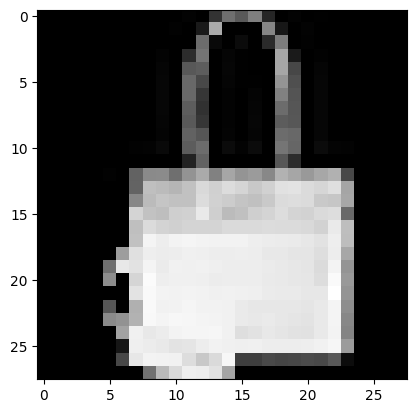

In [26]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [27]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [28]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255

In [29]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

Reperforming the earlier preprocessing methods

In [30]:
# Data is currently flattened, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [31]:
# LeNet requires input of 32 X 32. So we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [32]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 148ms/step - accuracy: 0.6377 - loss: 0.9624 - val_accuracy: 0.8296 - val_loss: 0.4573
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 156ms/step - accuracy: 0.8365 - loss: 0.4538 - val_accuracy: 0.8732 - val_loss: 0.3477
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 155ms/step - accuracy: 0.8631 - loss: 0.3815 - val_accuracy: 0.8842 - val_loss: 0.3126
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 154ms/step - accuracy: 0.8779 - loss: 0.3369 - val_accuracy: 0.8933 - val_loss: 0.2944
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 157ms/step - accuracy: 0.8859 - loss: 0.3150 - val_accuracy: 0.8972 - val_loss: 0.2831
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 156ms/step - accuracy: 0.8935 - loss: 0.2931 - val_accuracy: 0.9045 - val_loss: 0.2625
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 157ms/step - accuracy: 0.8979 - loss: 0.2877 - val_accuracy: 0.9063 - val_loss: 0.2588
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 152ms/step - accuracy: 0.9004 - loss: 0

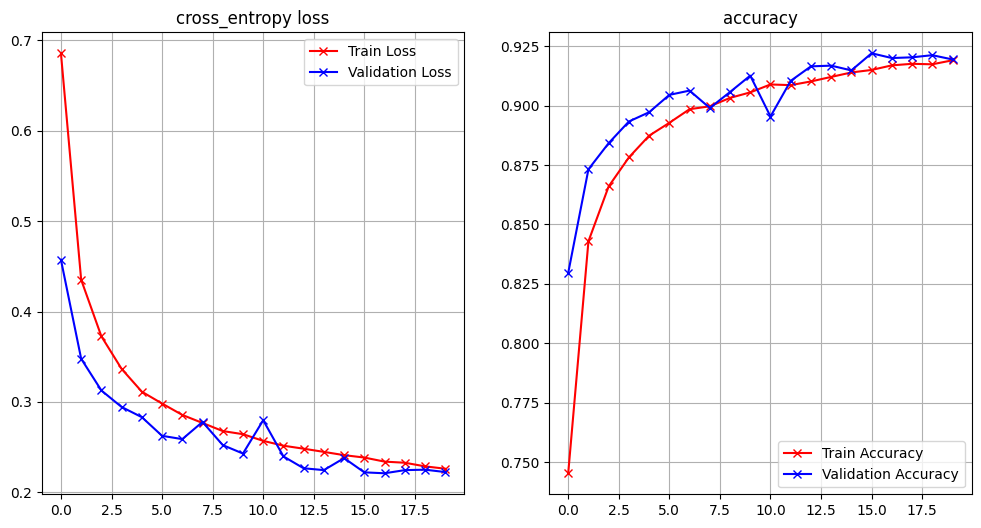

In [38]:
from keras.callbacks import EarlyStopping

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.pad(x_train, ((0,0), (2,2), (2,2)), 'constant')
x_test = np.pad(x_test, ((0,0), (2,2), (2,2)), 'constant')
x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))

model_3.add(Dropout(0.5))

model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

model_3.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_3 = model_3.fit(x_train, y_train,
                        batch_size=128,
                        epochs=20,
                        verbose=1,
                        validation_data=(x_test, y_test))

score = model_3.evaluate(x_test, y_test, verbose=0)
print("Fashion MNIST Test Loss:", score[0])
print("Fashion MNIST Test Accuracy:", score[1])

plot_loss_accuracy(history_3)
